# How many tornados?

In [23]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, substring
import os
import glob
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType
from datetime import datetime
from functools import reduce
import glob
import os

# Initialize Spark with proper configuration
spark = SparkSession.builder \
    .appName("Tornado Analysis") \
    .master("local[*]") \
    .config("spark.driver.memory", "4g") \
    .config("spark.sql.shuffle.partitions", "4") \
    .getOrCreate()

# Set log level to reduce noise
spark.sparkContext.setLogLevel("ERROR")

# Path to your directories
base_path = "/home/alumno/reposirotio/Grupo3"

In [6]:
# Initialize tornado counter
total_tornados = 0
years_processed = 0

# Get all year directories
year_dirs = sorted(glob.glob(f"{base_path}/*.tar"))

print(f"Found {len(year_dirs)} year directories to process\n")

# Process each year
for year_dir in year_dirs:
    year = os.path.basename(year_dir).replace('.tar', '')
    
    try:
        print(f"Processing year {year}...")
        
        # Get all CSV files in the directory
        csv_files = glob.glob(f"{year_dir}/*.csv")
        
        if not csv_files:
            print(f"  No CSV files found in {year}")
            continue
        
        print(f"  Found {len(csv_files)} CSV files")
        
        # Read all CSVs from the directory
        df = spark.read \
            .option("header", "true") \
            .option("inferSchema", "false") \
            .csv(year_dir)
        
        # Count total rows
        total_rows = df.count()
        print(f"  Loaded {total_rows:,} rows")
        
        # Filter for tornados (6th character of FRSHTT == "1")
        # FRSHTT is a 6-digit string: positions 1-6 for F,R,S,H,T,T
        tornado_df = df.filter(
            (col("FRSHTT").isNotNull()) & 
            (col("FRSHTT") != "") &
            (substring(col("FRSHTT"), 6, 1) == "1")
        )
        
        tornado_count = tornado_df.count()
        total_tornados += tornado_count
        years_processed += 1
        
        print(f"  Year {year}: {tornado_count} tornado instances")
        print(f"  Running total: {total_tornados:,}\n")
        
        # Unpersist the DataFrame
        df.unpersist()
        tornado_df.unpersist()
        
    except Exception as e:
        print(f"  Error processing {year}: {str(e)[:200]}\n")
        continue

print(f"\n{'='*60}")
print(f"FINAL RESULTS")
print(f"{'='*60}")
print(f"Years processed: {years_processed}")
print(f"Total tornado instances (1929-2025): {total_tornados:,}")
print(f"{'='*60}")

# Stop Spark
spark.stop()

Found 93 year directories to process

Processing year 1929...
  Found 21 CSV files
  Loaded 2,081 rows
  Year 1929: 0 tornado instances
  Running total: 0

Processing year 1930...
  Found 23 CSV files
  Loaded 7,285 rows
  Year 1930: 0 tornado instances
  Running total: 0

Processing year 1931...
  Found 31 CSV files
  Loaded 9,913 rows
  Year 1931: 1 tornado instances
  Running total: 1

Processing year 1932...
  Found 39 CSV files
  Loaded 10,931 rows
  Year 1932: 1 tornado instances
  Running total: 2

Processing year 1933...
  Found 91 CSV files
  Loaded 18,248 rows
  Year 1933: 2 tornado instances
  Running total: 4

Processing year 1934...
  Found 111 CSV files
  Loaded 20,916 rows
  Year 1934: 6 tornado instances
  Running total: 10

Processing year 1935...
  Found 143 CSV files


  Loaded 27,357 rows
  Year 1935: 8 tornado instances
  Running total: 18

Processing year 1936...
  Found 275 CSV files


  Loaded 51,360 rows
  Year 1936: 12 tornado instances
  Running total: 30

Processing year 1937...
  Found 332 CSV files


  Loaded 84,913 rows
  Year 1937: 4 tornado instances
  Running total: 34

Processing year 1938...
  Found 201 CSV files


  Loaded 51,912 rows
  Year 1938: 6 tornado instances
  Running total: 40

Processing year 1939...
  Found 275 CSV files


  Loaded 65,650 rows
  Year 1939: 6 tornado instances
  Running total: 46

Processing year 1944...
  Found 869 CSV files


  Loaded 246,069 rows


  Year 1944: 3 tornado instances
  Running total: 49

Processing year 1945...
  Found 1021 CSV files


  Loaded 262,266 rows


  Year 1945: 4 tornado instances
  Running total: 53

Processing year 1946...
  Found 653 CSV files


  Loaded 144,144 rows


  Year 1946: 6 tornado instances
  Running total: 59

Processing year 1947...
  Found 506 CSV files


  Loaded 146,457 rows


  Year 1947: 5 tornado instances
  Running total: 64

Processing year 1948...
  Found 1248 CSV files


  Loaded 296,249 rows


  Year 1948: 27 tornado instances
  Running total: 91

Processing year 1949...
  Found 1212 CSV files


  Loaded 300,610 rows


  Year 1949: 23 tornado instances
  Running total: 114

Processing year 1950...
  Found 1679 CSV files


  Loaded 984,386 rows


  Year 1950: 66 tornado instances
  Running total: 180

Processing year 1951...
  Found 1520 CSV files


  Loaded 926,666 rows


  Year 1951: 50 tornado instances
  Running total: 230

Processing year 1952...
  Found 1889 CSV files


  Loaded 1,130,022 rows


  Year 1952: 64 tornado instances
  Running total: 294

Processing year 1953...
  Found 2274 CSV files


  Loaded 1,215,019 rows


  Year 1953: 30 tornado instances
  Running total: 324

Processing year 1954...
  Found 2368 CSV files


  Loaded 1,294,613 rows


  Year 1954: 52 tornado instances
  Running total: 376

Processing year 1955...
  Found 2623 CSV files


  Loaded 1,251,360 rows


  Year 1955: 50 tornado instances
  Running total: 426

Processing year 1956...
  Found 162 CSV files


  Loaded 696,913 rows


  Year 1956: 28 tornado instances
  Running total: 454

Processing year 1957...
  Found 3541 CSV files


  Loaded 1,626,022 rows


  Year 1957: 62 tornado instances
  Running total: 516

Processing year 1958...
  Found 3383 CSV files


  Loaded 1,761,300 rows


  Year 1958: 36 tornado instances
  Running total: 552

Processing year 1959...
  Found 4126 CSV files


  Loaded 1,705,595 rows


  Year 1959: 54 tornado instances
  Running total: 606

Processing year 1960...
  Found 3770 CSV files


  Loaded 1,771,677 rows


  Year 1960: 62 tornado instances
  Running total: 668

Processing year 1961...
  Found 3963 CSV files


  Loaded 1,847,940 rows


  Year 1961: 82 tornado instances
  Running total: 750

Processing year 1962...
  Found 2331 CSV files


  Loaded 1,439,183 rows


  Year 1962: 53 tornado instances
  Running total: 803

Processing year 1963...
  Found 3672 CSV files


  Loaded 1,859,505 rows


  Year 1963: 64 tornado instances
  Running total: 867

Processing year 1964...
  Found 2564 CSV files


  Loaded 1,609,929 rows


  Year 1964: 60 tornado instances
  Running total: 927

Processing year 1965...
  Found 2152 CSV files


  Loaded 1,269,779 rows


  Year 1965: 26 tornado instances
  Running total: 953

Processing year 1966...
  Found 2083 CSV files


  Loaded 1,305,612 rows


  Year 1966: 20 tornado instances
  Running total: 973

Processing year 1967...
  Found 2086 CSV files


  Loaded 1,310,565 rows


  Year 1967: 24 tornado instances
  Running total: 997

Processing year 1968...
  Found 1859 CSV files


  Loaded 1,203,214 rows


  Year 1968: 58 tornado instances
  Running total: 1,055

Processing year 1969...
  Found 2863 CSV files


  Loaded 1,771,156 rows


  Year 1969: 314 tornado instances
  Running total: 1,369

Processing year 1970...
  Found 2757 CSV files


  Loaded 1,736,486 rows


  Year 1970: 294 tornado instances
  Running total: 1,663

Processing year 1971...
  Found 2491 CSV files


  Loaded 974,860 rows


  Year 1971: 176 tornado instances
  Running total: 1,839

Processing year 1972...
  Found 587 CSV files


  Loaded 403,026 rows
  Year 1972: 18 tornado instances
  Running total: 1,857

Processing year 1973...
  Found 7996 CSV files


  Loaded 4,085,345 rows


  Year 1973: 1030 tornado instances
  Running total: 2,887

Processing year 1974...
  Found 8191 CSV files


  Loaded 4,170,320 rows


  Year 1974: 938 tornado instances
  Running total: 3,825

Processing year 1975...
  Found 8425 CSV files


  Loaded 4,390,372 rows


  Year 1975: 1296 tornado instances
  Running total: 5,121

Processing year 1976...
  Found 8387 CSV files


  Loaded 4,526,672 rows


  Year 1976: 1278 tornado instances
  Running total: 6,399

Processing year 1977...
  Found 8940 CSV files


  Loaded 4,516,175 rows


  Year 1977: 1408 tornado instances
  Running total: 7,807

Processing year 1978...
  Found 8442 CSV files


  Loaded 4,576,937 rows


  Year 1978: 1428 tornado instances
  Running total: 9,235

Processing year 1979...
  Found 8550 CSV files


  Loaded 4,600,771 rows


  Year 1979: 1318 tornado instances
  Running total: 10,553

Processing year 1980...
  Found 8511 CSV files


  Loaded 4,542,116 rows


  Year 1980: 1424 tornado instances
  Running total: 11,977

Processing year 1981...
  Found 8572 CSV files


  Loaded 4,619,797 rows


  Year 1981: 1316 tornado instances
  Running total: 13,293

Processing year 1982...
  Found 8446 CSV files


  Loaded 4,315,837 rows


  Year 1982: 1566 tornado instances
  Running total: 14,859

Processing year 1983...
  Found 8512 CSV files


  Loaded 4,507,903 rows


  Year 1983: 1414 tornado instances
  Running total: 16,273

Processing year 1984...
  Found 8677 CSV files


  Loaded 4,691,322 rows


  Year 1984: 1516 tornado instances
  Running total: 17,789

Processing year 1985...
  Found 8925 CSV files


  Loaded 4,781,516 rows


  Year 1985: 1414 tornado instances
  Running total: 19,203

Processing year 1986...
  Found 8891 CSV files


  Loaded 4,882,710 rows


  Year 1986: 1358 tornado instances
  Running total: 20,561

Processing year 1987...
  Found 9030 CSV files


  Loaded 4,998,681 rows


  Year 1987: 1362 tornado instances
  Running total: 21,923

Processing year 1988...
  Found 9175 CSV files


  Loaded 5,069,328 rows


  Year 1988: 1604 tornado instances
  Running total: 23,527

Processing year 1989...
  Found 9252 CSV files


  Loaded 5,088,717 rows


  Year 1989: 1298 tornado instances
  Running total: 24,825

Processing year 1990...
  Found 9712 CSV files


  Loaded 5,241,997 rows


  Year 1990: 1228 tornado instances
  Running total: 26,053

Processing year 1991...
  Found 9691 CSV files


  Loaded 5,136,146 rows


  Year 1991: 1114 tornado instances
  Running total: 27,167

Processing year 1992...
  Found 9140 CSV files


  Loaded 5,070,509 rows


  Year 1992: 1254 tornado instances
  Running total: 28,421

Processing year 1993...
  Found 9006 CSV files


  Loaded 5,138,755 rows


  Year 1993: 1278 tornado instances
  Running total: 29,699

Processing year 1994...
  Found 8952 CSV files


  Loaded 5,187,951 rows


  Year 1994: 1270 tornado instances
  Running total: 30,969

Processing year 1995...
  Found 8790 CSV files


  Loaded 5,068,269 rows


  Year 1995: 1206 tornado instances
  Running total: 32,175

Processing year 1996...
  Found 8597 CSV files


  Loaded 5,014,276 rows


  Year 1996: 1352 tornado instances
  Running total: 33,527

Processing year 1997...
  Found 8540 CSV files


  Loaded 5,039,427 rows


  Year 1997: 1340 tornado instances
  Running total: 34,867

Processing year 1998...
  Found 8519 CSV files


  Loaded 5,027,302 rows


  Year 1998: 1140 tornado instances
  Running total: 36,007

Processing year 1999...
  Found 8464 CSV files


  Loaded 5,136,275 rows


  Year 1999: 1176 tornado instances
  Running total: 37,183

Processing year 2000...
  Found 8279 CSV files


  Loaded 5,102,226 rows


  Year 2000: 1012 tornado instances
  Running total: 38,195

Processing year 2001...
  Found 9008 CSV files


  Loaded 5,299,199 rows


  Year 2001: 974 tornado instances
  Running total: 39,169

Processing year 2002...
  Found 8990 CSV files


  Loaded 5,585,815 rows


  Year 2002: 958 tornado instances
  Running total: 40,127

Processing year 2003...
  Found 9081 CSV files


  Loaded 5,633,856 rows


  Year 2003: 890 tornado instances
  Running total: 41,017

Processing year 2004...
  Found 9574 CSV files


  Loaded 5,908,551 rows


  Year 2004: 828 tornado instances
  Running total: 41,845

Processing year 2005...
  Found 10130 CSV files


  Loaded 6,443,165 rows


  Year 2005: 884 tornado instances
  Running total: 42,729

Processing year 2006...
  Found 9479 CSV files


  Loaded 6,185,840 rows


  Year 2006: 860 tornado instances
  Running total: 43,589

Processing year 2007...
  Found 9782 CSV files


  Loaded 6,349,717 rows


  Year 2007: 792 tornado instances
  Running total: 44,381

Processing year 2008...
  Found 10363 CSV files


  Loaded 6,808,274 rows


  Year 2008: 800 tornado instances
  Running total: 45,181

Processing year 2009...
  Found 10723 CSV files


  Loaded 7,057,076 rows


  Year 2009: 798 tornado instances
  Running total: 45,979

Processing year 2010...
  Found 10902 CSV files


  Loaded 7,251,729 rows


  Year 2010: 774 tornado instances
  Running total: 46,753

Processing year 2011...
  Found 11088 CSV files


  Loaded 7,382,831 rows


  Year 2011: 678 tornado instances
  Running total: 47,431

Processing year 2012...
  Found 11875 CSV files


  Loaded 7,724,790 rows


  Year 2012: 790 tornado instances
  Running total: 48,221

Processing year 2013...
  Found 11870 CSV files


  Loaded 7,740,011 rows


  Year 2013: 696 tornado instances
  Running total: 48,917

Processing year 2014...
  Found 11958 CSV files


  Loaded 7,873,501 rows


  Year 2014: 656 tornado instances
  Running total: 49,573

Processing year 2015...
  Found 12100 CSV files


  Loaded 8,055,835 rows


  Year 2015: 690 tornado instances
  Running total: 50,263

Processing year 2016...
  Found 12111 CSV files


  Loaded 8,007,368 rows


  Year 2016: 692 tornado instances
  Running total: 50,955

Processing year 2017...
  Found 12337 CSV files


  Loaded 8,325,522 rows


  Year 2017: 614 tornado instances
  Running total: 51,569

Processing year 2018...
  Found 12426 CSV files


  Loaded 8,274,167 rows


  Year 2018: 600 tornado instances
  Running total: 52,169

Processing year 2019...
  Found 12387 CSV files


  Loaded 8,345,512 rows


  Year 2019: 620 tornado instances
  Running total: 52,789

Processing year 2020...
  Found 12299 CSV files


  Loaded 8,250,708 rows


  Year 2020: 472 tornado instances
  Running total: 53,261

Processing year 2021...
  Found 12275 CSV files


  Loaded 8,065,374 rows


  Year 2021: 516 tornado instances
  Running total: 53,777

Processing year 2022...
  Found 12319 CSV files


  Loaded 8,001,716 rows


  Year 2022: 590 tornado instances
  Running total: 54,367

Processing year 2023...
  Found 12311 CSV files


  Loaded 8,089,804 rows


  Year 2023: 520 tornado instances
  Running total: 54,887

Processing year 2024...
  Found 12159 CSV files


  Loaded 7,874,996 rows


  Year 2024: 414 tornado instances
  Running total: 55,301

Processing year 2025...
  Found 11656 CSV files


  Loaded 5,068,279 rows


  Year 2025: 266 tornado instances
  Running total: 55,567


FINAL RESULTS
Years processed: 93
Total tornado instances (1929-2025): 55,567


In [7]:
import re
import pandas as pd

# Path to your txt file
txt_file = "tornado_log.txt"

years = []
tornado_counts = []

with open(txt_file, "r") as f:
    for line in f:
        match = re.search(r"Year (\d{4}): (\d+) tornado instances", line)
        if match:
            years.append(int(match.group(1)))
            tornado_counts.append(int(match.group(2)))

# Create DataFrame
df = pd.DataFrame({
    "year": years,
    "tornado_instances": tornado_counts
})

print(df.head())


   year  tornado_instances
0  1929                  0
1  1930                  0
2  1931                  1
3  1932                  1
4  1933                  2


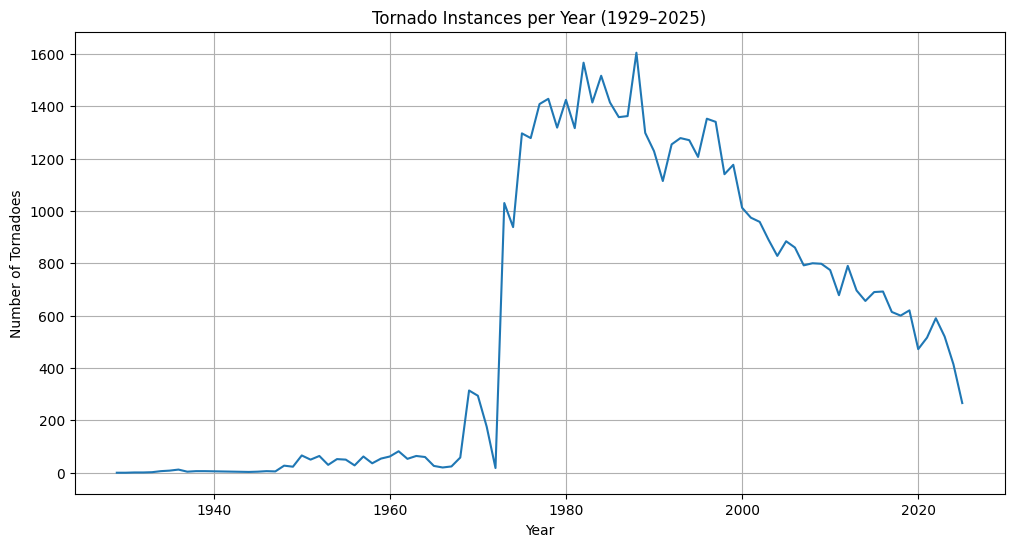

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df["year"], df["tornado_instances"])
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.title("Tornado Instances per Year (1929–2025)")
plt.grid(True)
plt.show()


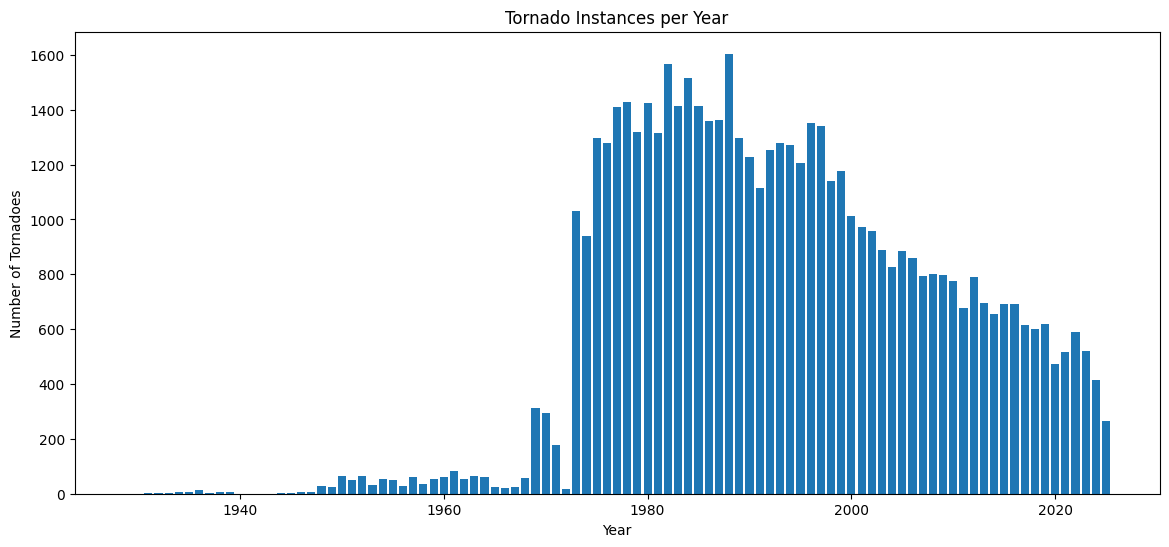

In [9]:
plt.figure(figsize=(14, 6))
plt.bar(df["year"], df["tornado_instances"])
plt.xlabel("Year")
plt.ylabel("Number of Tornadoes")
plt.title("Tornado Instances per Year")
plt.show()


In [15]:
import re
import pandas as pd

txt_file = "tornado_log.txt"

data = {}
current_year = None

with open(txt_file, "r") as f:
    for line in f:
        # Match year
        year_match = re.search(r"Processing year (\d{4})", line)
        if year_match:
            current_year = int(year_match.group(1))
            data[current_year] = {"rows": 0, "tornadoes": 0}
            continue

        # Match loaded rows
        rows_match = re.search(r"Loaded ([\d,]+) rows", line)
        if rows_match and current_year is not None:
            rows = int(rows_match.group(1).replace(",", ""))
            data[current_year]["rows"] = rows
            continue

        # Match tornado instances
        tornado_match = re.search(r"Year \d{4}: (\d+) tornado instances", line)
        if tornado_match and current_year is not None:
            tornadoes = int(tornado_match.group(1))
            data[current_year]["tornadoes"] = tornadoes


In [16]:
df = (
    pd.DataFrame.from_dict(data, orient="index")
    .reset_index()
    .rename(columns={"index": "year"})
)

df["tornado_permille"] = (df["tornadoes"] / df["rows"]) * 1000

print(df.head())


   year   rows  tornadoes  tornado_permille
0  1929   2081          0          0.000000
1  1930   7285          0          0.000000
2  1931   9913          1          0.100878
3  1932  10931          1          0.091483
4  1933  18248          2          0.109601


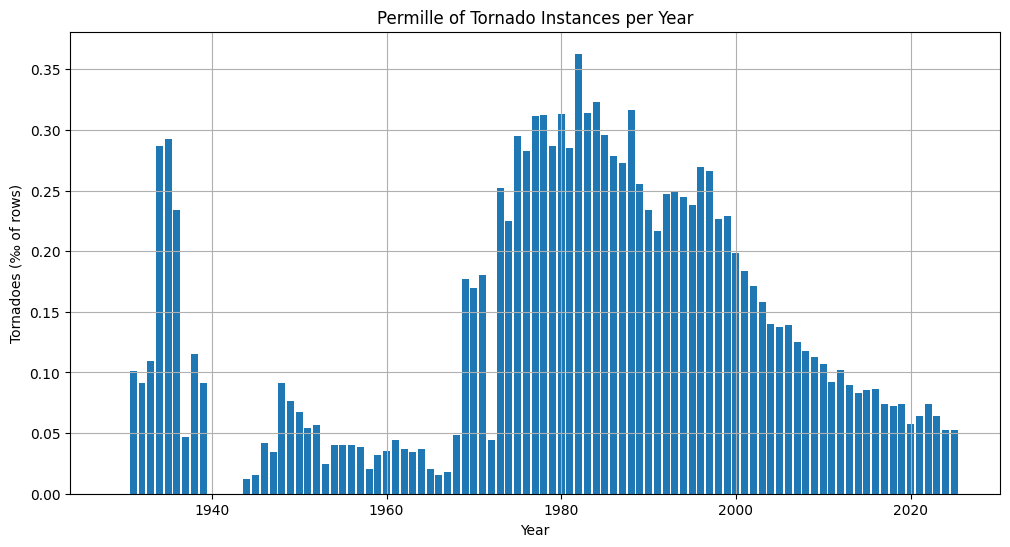

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(df["year"], df["tornado_permille"])
plt.xlabel("Year")
plt.ylabel("Tornadoes (‰ of rows)")
plt.title("Permille of Tornado Instances per Year")
plt.grid(True)
plt.show()


Reading row counts from tornado_log.txt...

Plot saved as 'rows_per_year.png'



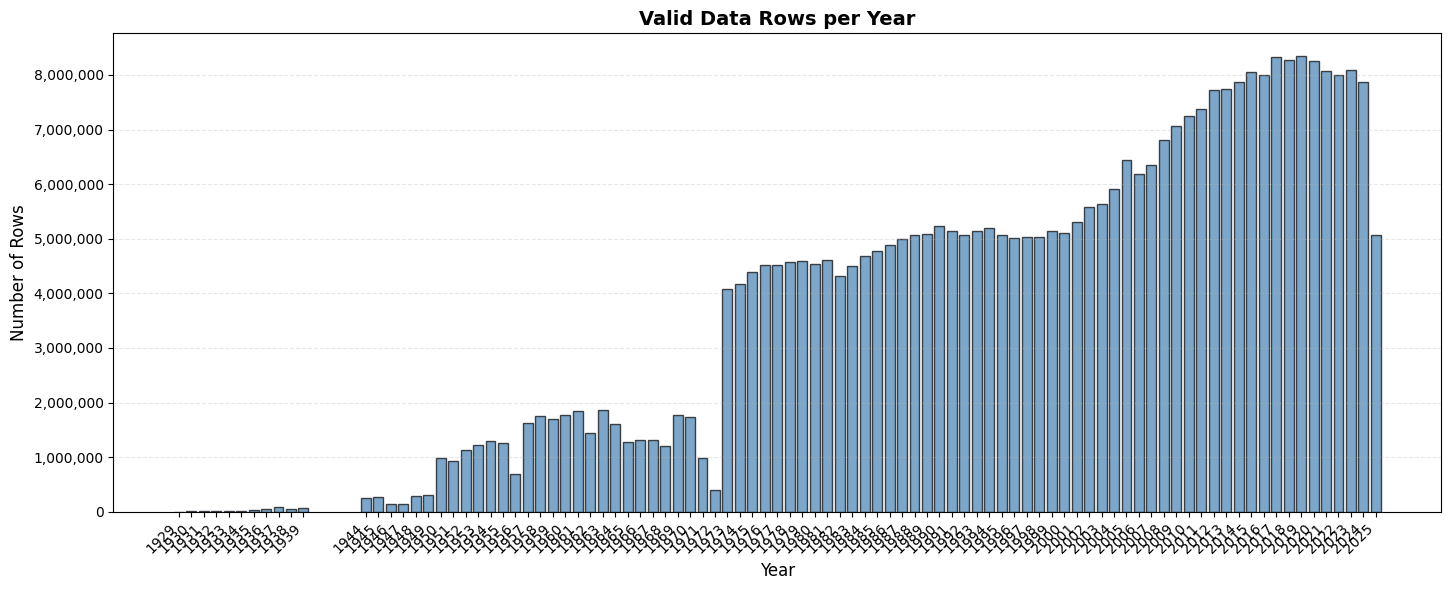

Total years found in log: 93
Year range: 1929 - 2025



In [25]:
# -------------------------------
# READ ROW COUNTS FROM LOG FILE
# -------------------------------
log_file = "tornado_log.txt"  # Update with your actual log file path
year_row_counts = {}

if os.path.exists(log_file):
    print(f"Reading row counts from {log_file}...\n")
    with open(log_file, 'r') as f:
        for line in f:
            # Parse lines like "Processing year 2010..." and "  Loaded 1,234,567 rows"
            year_match = re.search(r'Processing year (\d{4})', line)
            if year_match:
                current_year_parsing = int(year_match.group(1))
            
            rows_match = re.search(r'Loaded ([\d,]+) rows', line)
            if rows_match and 'current_year_parsing' in locals():
                row_count = int(rows_match.group(1).replace(',', ''))
                year_row_counts[current_year_parsing] = row_count
    
    # Plot rows per year
    if year_row_counts:
        years = sorted(year_row_counts.keys())
        counts = [year_row_counts[y] for y in years]
        
        plt.figure(figsize=(14, 6))
        plt.bar(years, counts, color='steelblue', edgecolor='black', alpha=0.7)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Number of Rows', fontsize=12)
        plt.title('Valid Data Rows per Year', fontsize=14, fontweight='bold')
        plt.grid(axis='y', alpha=0.3, linestyle='--')
        plt.xticks(years, rotation=45, ha='right')
        plt.tight_layout()
        
        # Format y-axis with commas
        ax = plt.gca()
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))
        
        plt.savefig('rows_per_year.png', dpi=300, bbox_inches='tight')
        print(f"Plot saved as 'rows_per_year.png'\n")
        plt.show()
        
        print(f"Total years found in log: {len(years)}")
        print(f"Year range: {min(years)} - {max(years)}\n")
else:
    print(f"Log file '{log_file}' not found. Skipping plot.\n")

In [24]:
# -------------------------------
# CONFIG
# -------------------------------
base_path = "/home/alumno/reposirotio/Grupo3"
current_year = datetime.now().year
min_year = current_year - 15

# -------------------------------
# COLLECT SNOW DATA (LAST 15 YEARS)
# -------------------------------
snow_dfs = []
year_dirs = sorted(glob.glob(f"{base_path}/*.tar"))
print(f"Found {len(year_dirs)} year archives\n")

for year_dir in year_dirs:
    year = os.path.basename(year_dir).replace(".tar", "")
    
    if not year.isdigit():
        continue
    year_int = int(year)
    if year_int < min_year:
        continue
        
    print(f"Processing year {year}...")
    
    try:
        df = (
            spark.read
            .option("header", "true")
            .option("inferSchema", "false")
            .csv(year_dir)
        )
        
        # Filter out any rows where SNDP is literally the string "SNDP" (header rows)
        # and convert to double, converting invalid values to null
        snow_df = (
            df.filter(col("SNDP") != "SNDP")  # Remove header rows
              .select(
                  col("SNDP").cast(DoubleType()),
                  col("TEMP").cast(DoubleType()),
                  col("PRCP").cast(DoubleType()),
                  col("LATITUDE").cast(DoubleType()),
                  col("ELEVATION").cast(DoubleType())
              )
              .dropna()
        )
        
        # Check if we got any data
        row_count = snow_df.count()
        print(f"  Loaded {row_count:,} valid rows")
        
        if row_count > 0:
            snow_dfs.append(snow_df)
        
        df.unpersist()
        
    except Exception as e:
        print(f"  Error: {str(e)[:100]}")
        continue

if not snow_dfs:
    print("\nNo data collected!")
    spark.stop()
    exit()

# -------------------------------
# MERGE ALL YEARS
# -------------------------------
print("\nMerging all years...")
snow_all = reduce(lambda a, b: a.union(b), snow_dfs)
total_rows = snow_all.count()
zero_snow = snow_all.filter(col("SNDP") == 0).count()

print(f"\nTotal rows used: {total_rows:,}")
print(f"Zero-snow days: {zero_snow:,} ({zero_snow / total_rows:.2%})\n")

# -------------------------------
# CORRELATIONS WITH SNDP
# -------------------------------
features = ["TEMP", "PRCP", "LATITUDE", "ELEVATION"]
print("Correlation with SNDP:")
for feature in features:
    corr = snow_all.stat.corr("SNDP", feature)
    print(f"  SNDP vs {feature}: {corr:.4f}")

# -------------------------------
# OPTIONAL: CONDITIONAL CORRELATION
# -------------------------------
snow_nonzero = snow_all.filter(col("SNDP") > 0)
print("\nCorrelation with SNDP (SNDP > 0 only):")
for feature in features:
    corr = snow_nonzero.stat.corr("SNDP", feature)
    print(f"  SNDP vs {feature}: {corr:.4f}")

# Stop Spark
spark.stop()

Found 93 year archives

Processing year 2010...


  Loaded 7,236,756 valid rows
Processing year 2011...


  Loaded 7,362,836 valid rows
Processing year 2012...


  Loaded 7,696,176 valid rows
Processing year 2013...


  Loaded 7,712,498 valid rows
Processing year 2014...


  Loaded 7,843,178 valid rows
Processing year 2015...


  Loaded 8,016,748 valid rows
Processing year 2016...


  Loaded 7,969,998 valid rows
Processing year 2017...


  Loaded 8,289,386 valid rows
Processing year 2018...


  Loaded 8,235,792 valid rows
Processing year 2019...


  Loaded 8,310,706 valid rows
Processing year 2020...


  Loaded 8,211,444 valid rows
Processing year 2021...


  Loaded 8,027,548 valid rows
Processing year 2022...


  Loaded 7,964,102 valid rows
Processing year 2023...


  Loaded 8,049,954 valid rows
Processing year 2024...


  Loaded 7,838,196 valid rows
Processing year 2025...


  Loaded 5,039,690 valid rows

Merging all years...



Total rows used: 123,805,008
Zero-snow days: 0 (0.00%)

Correlation with SNDP:


  SNDP vs TEMP: 0.4540


  SNDP vs PRCP: 0.0429


  SNDP vs LATITUDE: -0.2122


  SNDP vs ELEVATION: -0.0048

Correlation with SNDP (SNDP > 0 only):


  SNDP vs TEMP: 0.4540


  SNDP vs PRCP: 0.0429


  SNDP vs LATITUDE: -0.2122


  SNDP vs ELEVATION: -0.0048
